()


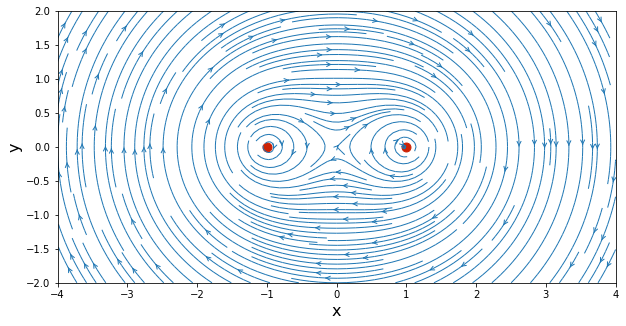

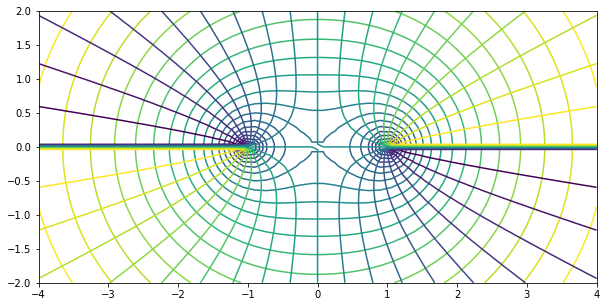

In [50]:
import numpy
import math
from matplotlib import pyplot  

%matplotlib inline

def Eu_int(fprime,dt,z):
    dW=fprime(z)
    xold,yold=z.real,z.imag
    u,v=dW.real,-dW.imag
    xnew=xold+dt*u
    ynew=yold+dt*v
    znew=xnew+1j*ynew
    return znew

def RK2_int(fprime,dt,z):
    xold,yold=z.real,z.imag
    dW=fprime(z)
    u,v=dW.real,-dW.imag
    xk1=dt*u
    yk1=dt*v
    zk1=(xold+xk1)+1j*(yold+yk1)
    dW=fprime(zk1)
    u,v=dW.real,-dW.imag
    xk2=dt*u
    yk2=dt*v
    xnew=xold+0.5*(xk1+xk2)
    ynew=yold+0.5*(yk1+yk2)
    znew=xnew+1j*ynew
    return znew

def fW(z,zl,zr):
    return 1j*Gamma/(2*numpy.pi)*numpy.log((z-zl)/zl)+1j*Gamma/(2*numpy.pi)*numpy.log((z-zr)/zr)

def dWdz(z,zl,zr):
    return 1j*Gamma/(2*numpy.pi*(z-zl))+1j*Gamma/(2*numpy.pi*(z-zr))

N = 50                                # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)  # generates a mesh grid
xv1,yv1=-1.0,0.0
xv2,yv2=1.0,0.0
zv1=xv1+1j*yv1
zv2=xv2+1j*yv2

print(numpy.shape(zv1))

Z=X+1j*Y
Gamma=1.0

W=fW(Z,zv1,zv2)

dW=dWdz(Z,zv1,zv2)
u=dW.real
v=-dW.imag

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([xv1,xv2], [yv1,yv2], color='#CD2305', s=80, marker='o');

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.contour(X,Y,W.imag,20)
pyplot.contour(X,Y,W.real,20)



(-2.0, 2.0)

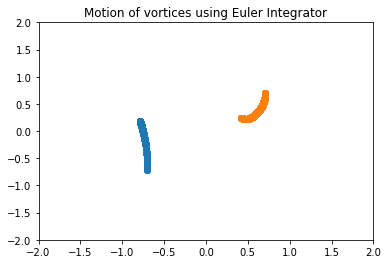

In [101]:
t=0
tf=5.0

dt=0.001

strength=2*numpy.pi

def fW(z,zl,zr):
    return 1j*Gamma/(2*numpy.pi)*numpy.log((z-zl)/zl)+1j*Gamma/(2*numpy.pi)*numpy.log((z-zr)/zr)

def dWdz(z,zl,zr):
    return 1j*Gamma/(2*numpy.pi*(z-zl))+1j*Gamma/(2*numpy.pi*(z-zr))

def Eu_int(fprime,dt,z,zl,zr):
    dW=fprime(z,zl,zr)
    xold,yold=z.real,z.imag
    u,v=dW.real,-dW.imag
    xnew=xold+dt*u
    ynew=yold+dt*v
    znew=xnew+1j*ynew
    return znew

def RK2_int(fprime,dt,z,zl,zr):
    xold,yold=z.real,z.imag
    dW=fprime(z,zl,zr)
    u,v=dW.real,-dW.imag
    xk1=dt*u
    yk1=dt*v
    zk1=(xold+xk1)+1j*(yold+yk1)
    dW=fprime(zk1,zl,zr)
    u,v=dW.real,-dW.imag
    xk2=dt*u
    yk2=dt*v
    xnew=xold+0.5*(xk1+xk2)
    ynew=yold+0.5*(yk1+yk2)
    znew=xnew+1j*ynew
    return znew


theta0=numpy.pi/4.0

x1,y1 = -1.0*numpy.sin(theta0),-1*numpy.cos(theta0)
x2,y2 = 1.0*numpy.sin(theta0),1.0*numpy.cos(theta0)
z1=complex(x1,y1)
z2=complex(x2,y2)

xl,yl=-1.0,0.0
xr,yr=1.0,0.0
zl=xl+1j*yl
zr=xr+1j*yr
# print(zl,zr)

xl_a,yl_a=[x1],[y1]
xr_a,yr_a=[x2],[y2]


while t<tf:
    z1=Eu_int(dWdz,dt,z1,zl,zr)
    z2=Eu_int(dWdz,dt,z2,zl,zr)
    dtheta=numpy.abs(theta0-numpy.arctan(z1.imag/z1.real))
    xl=-1.0*numpy.sin(-dtheta);yl=-1.0*numpy.cos(-dtheta)
    xl_a.append(z1.real)
    yl_a.append(z1.imag)
    
    dtheta=numpy.abs(theta0-numpy.arctan(z2.imag/z2.real))
    xr=1.0*numpy.sin(dtheta);yr=1.0*numpy.cos(dtheta)
    xr_a.append(z2.real)
    yr_a.append(z2.imag)
    zl=xl+1j*yl
    zr=xr+1j*yr
    t+=dt
    

xl_a=numpy.array(xl_a)
yl_a=numpy.array(yl_a)


pyplot.title("Motion of vortices using Euler Integrator")    
pyplot.plot(xl_a,yl_a,linewidth=0,marker='o')
pyplot.plot(xr_a,yr_a,linewidth=0,marker='o')
# pyplot.axis('square')
pyplot.xlim(-2.0,2.0)
pyplot.ylim(-2.0,2.0)




(-1, 1)

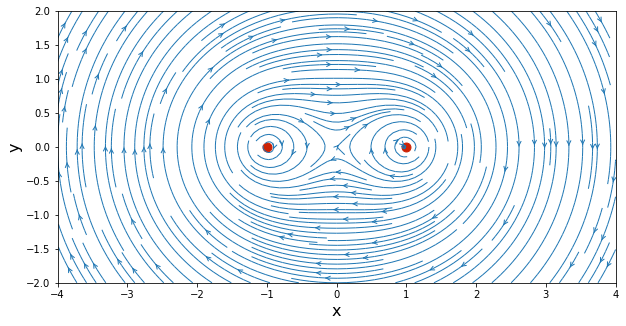

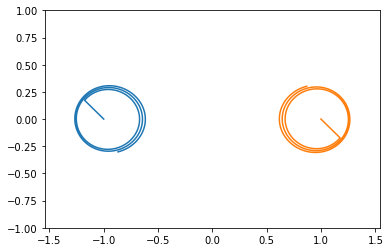

In [109]:
import numpy
import math
from matplotlib import pyplot  

%matplotlib inline

def Eu_int(fprime,dt,z):
    dW=fprime(z)
    xold,yold=z.real,z.imag
    u,v=dW.real,-dW.imag
    xnew=xold+dt*u
    ynew=yold+dt*v
    znew=xnew+1j*ynew
    return znew

def RK2_int(fprime,dt,z):
    xold,yold=z.real,z.imag
    dW=fprime(z)
    u,v=dW.real,-dW.imag
    xk1=dt*u
    yk1=dt*v
    zk1=(xold+xk1)+1j*(yold+yk1)
    dW=fprime(zk1)
    u,v=dW.real,-dW.imag
    xk2=dt*u
    yk2=dt*v
    xnew=xold+0.5*(xk1+xk2)
    ynew=yold+0.5*(yk1+yk2)
    znew=xnew+1j*ynew
    return znew

def fW(z):
    return 1j*Gamma/(2*numpy.pi)*numpy.log((z-zl)/zl)+1j*Gamma/(2*numpy.pi)*numpy.log((z-zr)/zr)

def dWdz(z):
    return 1j*Gamma/(2*numpy.pi*(z-zl))+1j*Gamma/(2*numpy.pi*(z-zr))

N = 50                                # Number of points in each direction
x_start, x_end = -4.0, 4.0            # x-direction boundaries
y_start, y_end = -2.0, 2.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)  # generates a mesh grid
xv1,yv1=-1.0,0.0
xv2,yv2=1.0,0.0
zl=xv1+1j*yv1
zr=xv2+1j*yv2

Z=X+1j*Y
Gamma=1.0

W=fW(Z)

dW=dWdz(Z)
u=dW.real
v=-dW.imag

size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter([xv1,xv2], [yv1,yv2], color='#CD2305', s=80, marker='o');

t=0
tf=10.0

dt=0.01

strength=1.0

xl,yl = -0.999,0.0
xr,yr = 0.999,0.0
zl=complex(xl,yl)
zr=complex(xr,yr)

xl_a,yl_a=[xl],[yl]
xr_a,yr_a=[xr],[yr]


while t<tf:
    zl_e=Eu_int(dWdz,dt,zl_e)
    xl_a.append(zl_e.real)
    yl_a.append(zl_e.imag)
    zr_e=Eu_int(dWdz,dt,zr_e)
    xr_a.append(zr_e.real)
    yr_a.append(zr_e.imag)
    t+=dt
    

pyplot.figure()
pyplot.plot(xl_a,yl_a)
pyplot.plot(xr_a,yr_a)
pyplot.axis('equal')
pyplot.xlim(-1,1)
pyplot.ylim(-1,1)

In [112]:
import numpy
import math
from matplotlib import pyplot  

%matplotlib inline

def Eu_int(fprime,dt,z,flag=0):
    dW=fprime(z,flag)
    xold,yold=z.real,z.imag
    u,v=dW.real,-dW.imag
    xnew=xold+dt*u
    ynew=yold+dt*v
    znew=xnew+1j*ynew
    return znew

def RK2_int(fprime,dt,z):
    xold,yold=z.real,z.imag
    dW=fprime(z)
    u,v=dW.real,-dW.imag
    xk1=dt*u
    yk1=dt*v
    zk1=(xold+xk1)+1j*(yold+yk1)
    dW=fprime(zk1)
    u,v=dW.real,-dW.imag
    xk2=dt*u
    yk2=dt*v
    xnew=xold+0.5*(xk1+xk2)
    ynew=yold+0.5*(yk1+yk2)
    znew=xnew+1j*ynew
    return znew

def fW(z):
    return 1j*Gamma/(2*numpy.pi)*numpy.log((z-zl)/zl)#+1j*Gamma/(2*numpy.pi)*numpy.log((z-zr)/zr)

def dWdz(z,flag=0):
    if flag==0:
        return 1j*Gamma/(2*numpy.pi*(z-zv))
    else:
        return 1j*Gamma/(2*numpy.pi*(z+zv))
                         

Gamma=1.0

W=fW(Z)

zv=complex(-1,0)

dW=dWdz(Z,1)
u=dW.real
v=-dW.imag




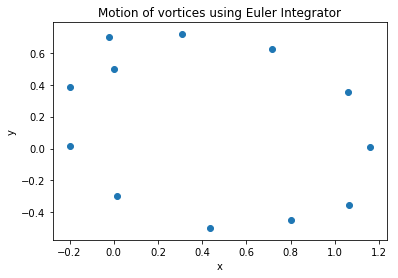

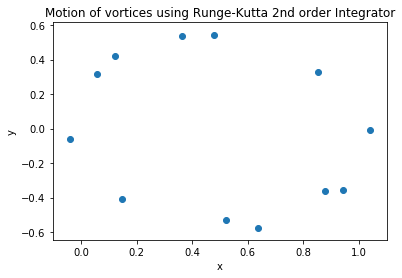

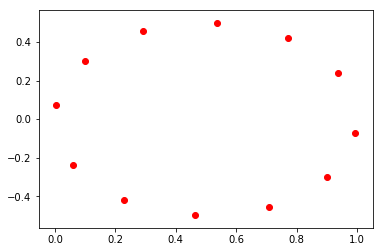

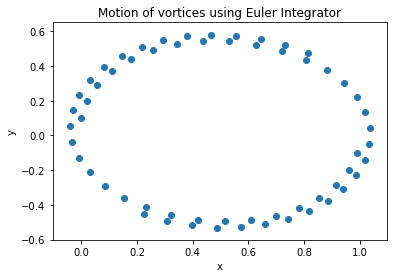

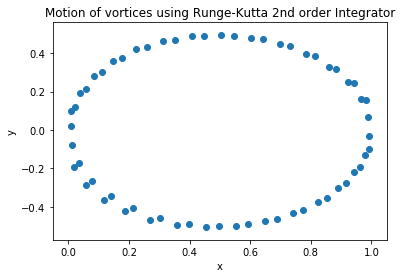

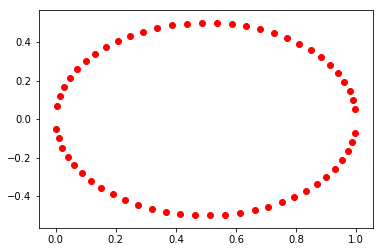

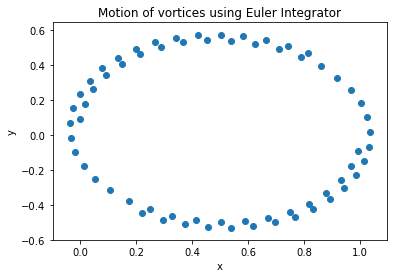

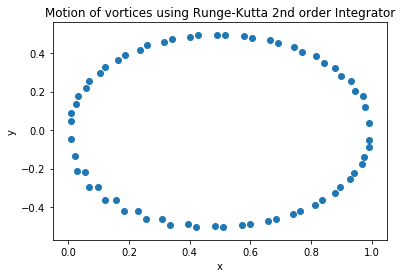

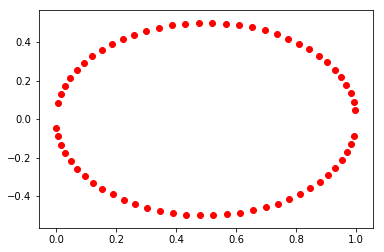

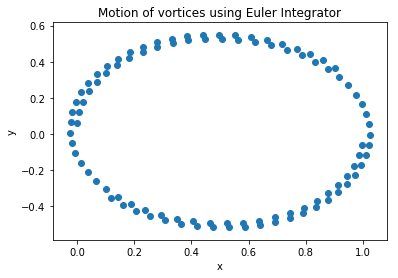

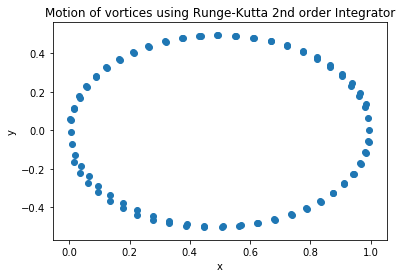

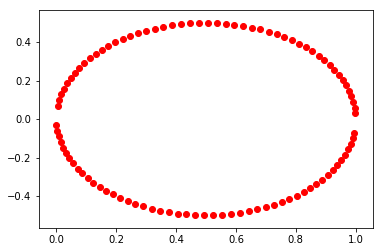

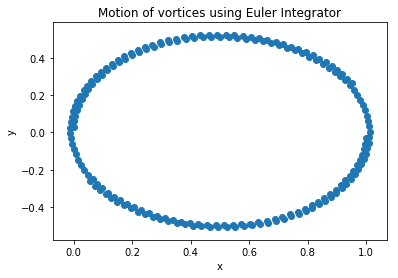

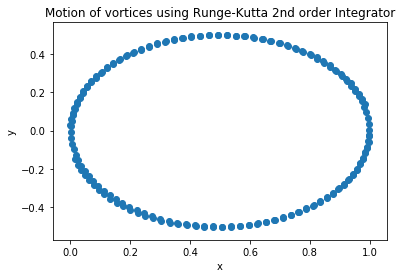

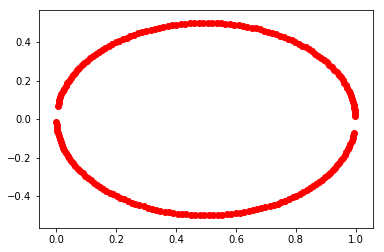

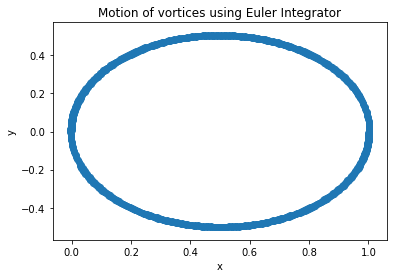

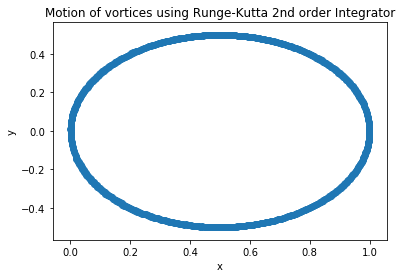

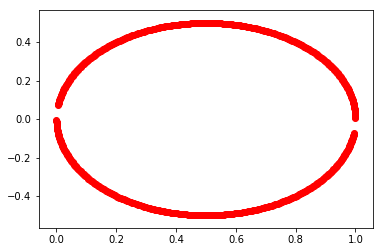

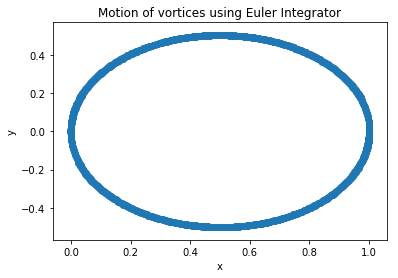

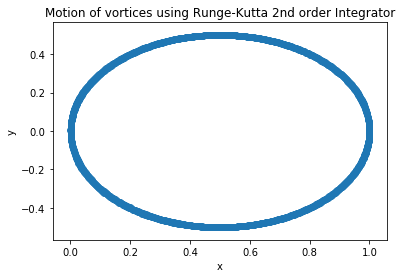

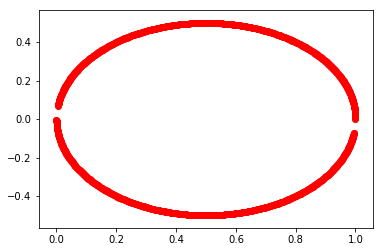

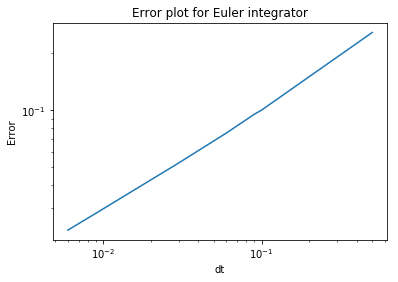

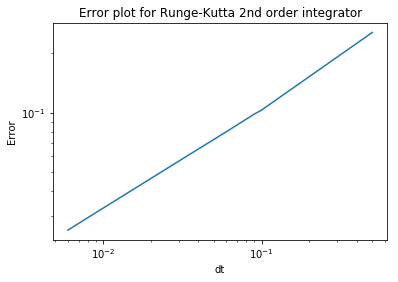

('Slope of error plot for Euler integrator is', 0.54750837534726093)
('Slope of error plot for Runge-Kutta 2nd order integrator is', 0.51996116580162577)


In [116]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.close('all')
tau0 = 2*np.pi
tau1 = 2*np.pi


c0 = tau0/(2*np.pi)
c1 = tau1/(2*np.pi)

error_eul = []
error_rk2 = []

dT = [0.5,0.1,0.09,0.06,0.03,0.009,0.006]

for j in range(len(dT)):
    
    x0 = 0
    xa0 = 0
    y0 = 0
    ya0 = 0
    x1 = 1
    xa1 = 1
    y1 = 0
    ya1 = 0
    
    rad0 = 0
    rad1 = np.pi
    
    x0r = 0
    y0r = 0
    x1r = 1
    y1r = 0
    
    x0array = []
    y0array = []
    x1array = []
    y1array = []
    x0rarray = []
    y0rarray = []
    x1rarray = []
    y1rarray = []
    
    x0_act = []
    y0_act = []
    x1_act = []
    y1_act = []
    
    dt = dT[j]
    t = 3
    n= t/dt

    for i in range(int(n)):
        
        x0 = x0 + dt*c1*((y0-y1)/((x0-x1)**2 + (y0-y1)**2))
        y0 = y0 + dt*-c1*((x0-x1)/((x0-x1)**2 + (y0-y1)**2))
        x1 = x1 + dt*c0*((y1-y0)/((x1-x0)**2 + (y1-y0)**2))
        y1 = y1 + dt*-c0*((x1-x0)/((x1-x0)**2 + (y1-y0)**2))
    
        k1_x0 = dt*((y0r-y1r)/((x0r-x1r)**2 + (y0r-y1r)**2))
        k1_y0 = -dt*((x0r-x1)/((x0r-x1)**2 + (y0r-y1r)**2))
        x0_p = x0r + k1_x0
        y0_p = y0r + k1_y0
        
        k1_x1 = dt*((y1r-y0r)/((x1r-x0r)**2 + (y1r-y0r)**2))
        k1_y1 = -dt*((x1r-x0r)/((x1r-x0r)**2 + (y1r-y0r)**2))
        x1_p = x1r + k1_x1
        y1_p = y1r + k1_y1
    
        k2_x0 = dt*((y0_p-y1_p)/((x0_p-x1_p)**2 + (y0_p-y1_p)**2))
        k2_y0 = -dt*((x0_p-x1_p)/((x0_p-x1_p)**2 + (y0_p-y1_p)**2))
        
        k2_x1 = dt*((y1_p-y0_p)/((x1_p-x0_p)**2 + (y1_p-y0_p)**2))
        k2_y1 = -dt*((x1_p-x0_p)/((x1_p-x0_p)**2 + (y1_p-y0_p)**2))
        
        x0r = x0r + 0.5*c1*(k1_x0 + k2_x0)
        y0r = y0r + 0.5*c1*(k1_y0 + k2_y0)
        x1r = x1r + 0.5*c0*(k1_x1 + k2_x1)
        y1r = y1r + 0.5*c0*(k1_y1 + k2_y1)
        
        rad0 = rad0 + dt*c0
        rad1 = rad1 + dt*c1
        
        xa0 = 0.5 + 0.5*np.cos(rad0) 
        ya0 = 0 + 0.5*np.sin(rad0)
        xa1 = 0.5 + 0.5*np.cos(rad1)
        ya1 = 0 + 0.5*np.sin(rad1)
        
        x0_act.append(xa0)
        y0_act.append(ya0)
        x1_act.append(xa1)
        y1_act.append(ya1)
        
        x0array.append(x0)
        y0array.append(y0) 
        x1array.append(x1)
        y1array.append(y1) 
        x0rarray.append(x0r)
        y0rarray.append(y0r)             
        x1rarray.append(x1r)
        y1rarray.append(y1r) 
                                            
    plt.figure(3*j +1)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Motion of vortices using Euler Integrator")    
    plt.scatter((x0array+x1array),(y0array+y1array))
    
    plt.figure(3*j+2)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Motion of vortices using Runge-Kutta 2nd order Integrator")    
    plt.scatter((x0rarray+x1rarray),(y0rarray+y1rarray))
    
    plt.figure(3*j+3)
    plt.scatter((x0_act+x1_act),(y0_act+y1_act),color='red')
    
    x_act = np.array((x0_act+x1_act))
    y_act = np.array((y0_act+y1_act))
    x_eul = np.array((x0array+x1array))
    y_eul = np.array((y0array+y1array))
    x_rk2 = np.array((x0rarray+x1rarray))
    y_rk2 = np.array((x0rarray+x1rarray))
    
    error_eul.append(np.sqrt(sum((x_act - x_eul)**2 + (y_act - y_eul)**2))/len(x_act))
    error_rk2.append(np.sqrt(sum((x_act - x_rk2)**2 + (y_act - y_rk2)**2))/len(x_act))
      

plt.figure()
plt.loglog(dT,error_eul)
plt.xlabel("dt")
plt.ylabel("Error")
plt.title("Error plot for Euler integrator")
plt.figure()
plt.loglog(dT,error_rk2)
plt.xlabel("dt")
plt.ylabel("Error")
plt.title("Error plot for Runge-Kutta 2nd order integrator")
plt.show()

slope_eul = (np.log(error_eul[0]) - np.log(error_eul[-1]))/(np.log(dT[0]) - np.log(dT[-1]))
slope_rk2 = (np.log(error_rk2[0]) - np.log(error_rk2[-1]))/(np.log(dT[0]) - np.log(dT[-1]))

print("Slope of error plot for Euler integrator is",slope_eul)
print("Slope of error plot for Runge-Kutta 2nd order integrator is",slope_rk2)